* Product analytics is a way to draw insights from data on how customers engage and
interact with products offered, how different products perform, and what some of the
observable weaknesses and strengths in a business are. However, product analytics does
not just stop at analyzing the data. The ultimate goal of product analytics is really to build
actionable insights and reports that can further help optimize and improve product
performance and generate new marketing or product ideas based on the findings of
product analytics.


* Product analytics starts by tracking events. These events can be customer website visits,
page views, browser histories, purchases, or any other actions that customers can take with
the products that you offer. Then, you can start analyzing and visualizing any observable
patterns in these events with the goal of creating actionable insights or reports. Some of the
common goals with product analytics are as follows:

Improve customer and product retention: By analyzing what customers viewed
and purchased, you can identify what items customers repeatedly purchase and
who those repeat customers are. On the other hand, you can also identify what
items customers do not buy and the customers who are at risk of churning.
Analyzing and understanding the common attributes of the repeatedly
purchased items and repeat customers can help you improve your retention
strategy.

Identify popular and trending products: As a marketer for retail businesses, it is
important to have a good understanding of popular and trending products.
These best-selling products are key revenue drivers for the business and provide
new selling opportunities, such as cross-sells or bundle sales. With product
analytics, you should be able to identify and track these popular and trending
products easily and generate new strategies to explore different opportunities
using these best-selling products.

Segment customers and products based on their key attributes: With the
customer profile and product data, you can segment your customer base and
products based on their attributes using product analytics. Some of the ways to
segment your product data are based on their profitability, volumes of sales,
volumes of reorders, and numbers of refunds. With these segmentations, you can
draw actionable insights on which product or customer segments to target next.

Develop marketing strategies with higher ROI: Product analytics can also be
used to analyze the return on investment (ROI) of your marketing strategies. By
analyzing the marketing dollars spent on promoting certain items and the
revenue generated from those products, you can understand what works and
what does not. Using product analytics for marketing ROI analyses can help you
create more efficient marketing strategies.

In [165]:
from IPython.core.pylabtools import figsize
from debugpy.common.log import warning
%matplotlib inline

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
df = pd.read_excel(io='Online Retail.xlsx', sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [168]:
df.shape

(541909, 8)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 1. Product Analysis

- Quantity Distribution

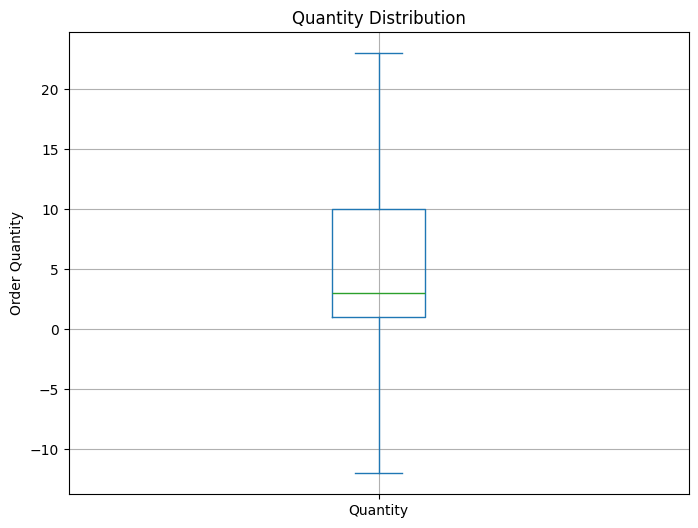

In [170]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    figsize=(8,6),
    grid=True,
    title='Quantity Distribution',
)

ax.set_ylabel('Order Quantity')

plt.show()

In [171]:
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [172]:
df.loc[df['Quantity'] > 0].shape

(531285, 8)

In [173]:
df.shape

(541909, 8)

In [174]:
df = df.loc[df['Quantity'] > 0]

# Time-Series Number of Orders

In [175]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/2379379258.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: ME, Name: InvoiceNo, dtype: int64

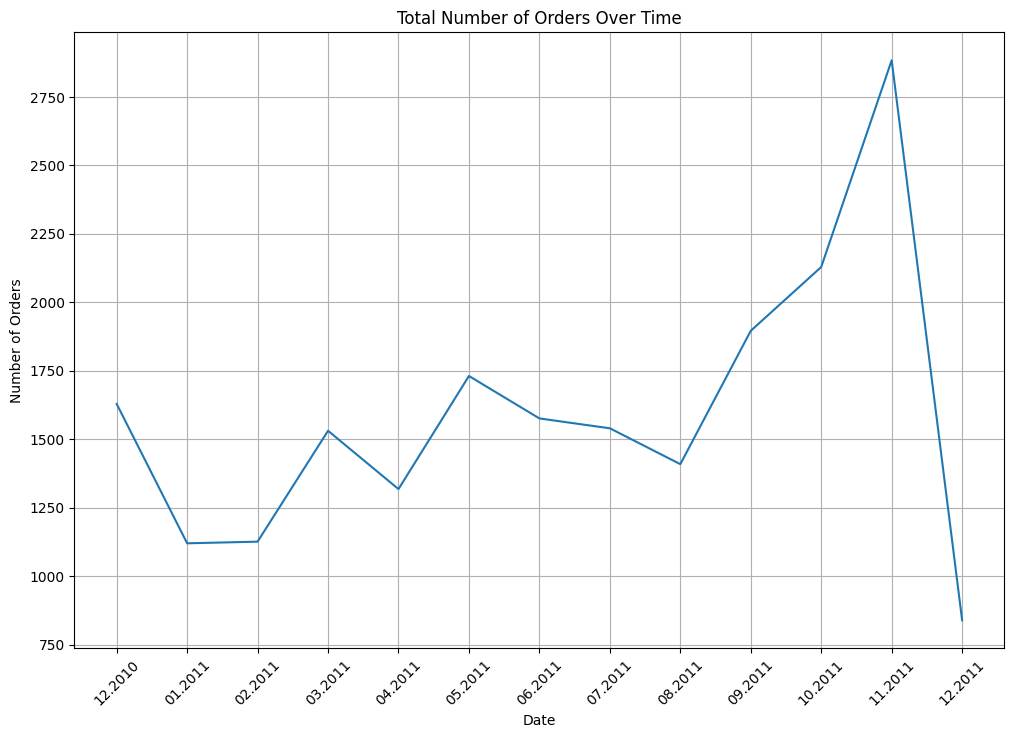

In [176]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    kind='line',
    grid=True,
    figsize=(12,8),
    legend=False
)

ax.set_title('Total Number of Orders Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders')

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()


In [177]:
invoice_dates = df.loc[
    df['InvoiceDate'] > '2011-12-1',
    'InvoiceDate'
]
invoice_dates

516403   2011-12-01 08:33:00
516404   2011-12-01 08:33:00
516405   2011-12-01 08:33:00
516406   2011-12-01 08:33:00
516407   2011-12-01 08:33:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 25135, dtype: datetime64[ns]

In [178]:
print(f"Min date {invoice_dates.min()}\nMax date {invoice_dates.max()}")

Min date 2011-12-01 08:33:00
Max date 2011-12-09 12:50:00


In [179]:
df.loc[df['InvoiceDate'] < '2011-12-1'].shape

(506150, 8)

In [180]:
df.shape

(531285, 8)

In [181]:
df = df.loc[df['InvoiceDate'] < '2011-12-1']

In [182]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/1670650263.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


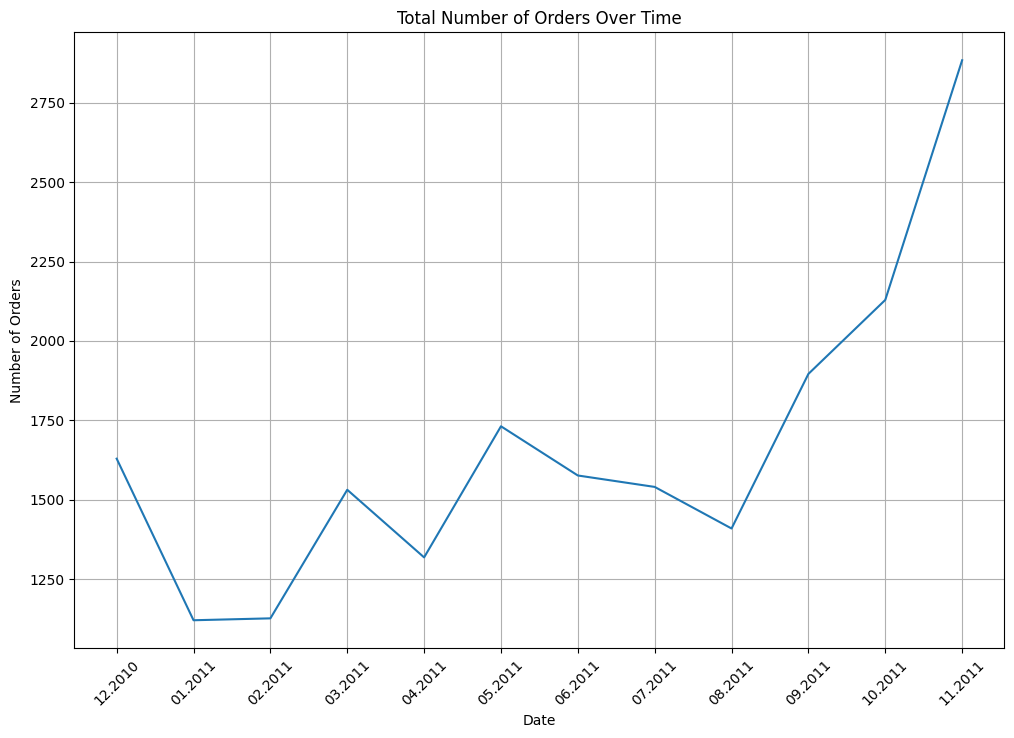

In [183]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    kind='line',
    grid=True,
    figsize=(12,8),
    legend=False
)
ax.set_title('Total Number of Orders Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders')
ax

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)
plt.show()

- Time Series Revenue

In [184]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [185]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [186]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/165311820.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()


In [187]:
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: ME, Name: Sales, dtype: float64

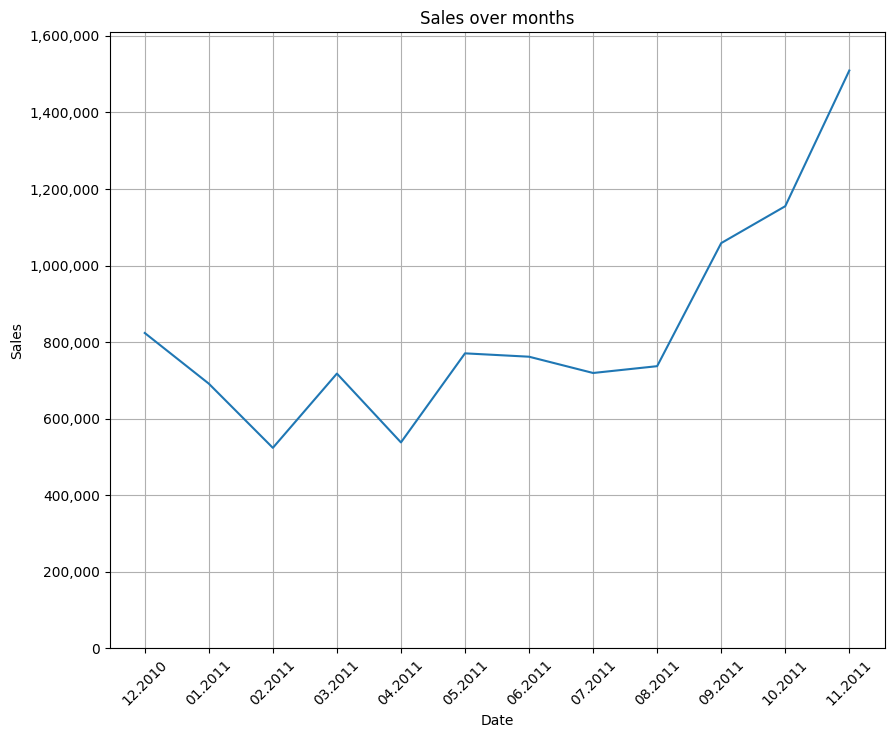

In [188]:
import matplotlib.ticker as mticker
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    kind='line',
    figsize=(10,8),
    grid=True,
    legend=False
)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Sales over months')

ax.set_ylim([0, max(monthly_revenue_df.values+100000)])

plt.xticks(
    range(len(monthly_revenue_df.index)),
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index],
    rotation=45
)

ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

- Time Series Repeat Customers

In [189]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [190]:
invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales':sum,
    'CustomerID':max,
    'Country':max 
}).reset_index()

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/4574699.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg({
/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/4574699.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg({


In [191]:
invoice_customer_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
19926,579881,2011-11-30 17:22:00,905.52,12429.0,Denmark
19927,579885,2011-11-30 17:37:00,1075.36,15444.0,United Kingdom
19928,A563185,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
19929,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [222]:
mothly_repeat_customer_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/1893675176.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'CustomerID'
/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/1893675176.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']


In [223]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: ME, Name: CustomerID, dtype: int64

In [204]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/705579180.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()


In [205]:
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: ME, Name: CustomerID, dtype: int64

In [206]:
monthly_repeat_percentage = monthly_repeat_customers_df / monthly_unique_customers_df * 100
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: ME, Name: CustomerID, dtype: float64

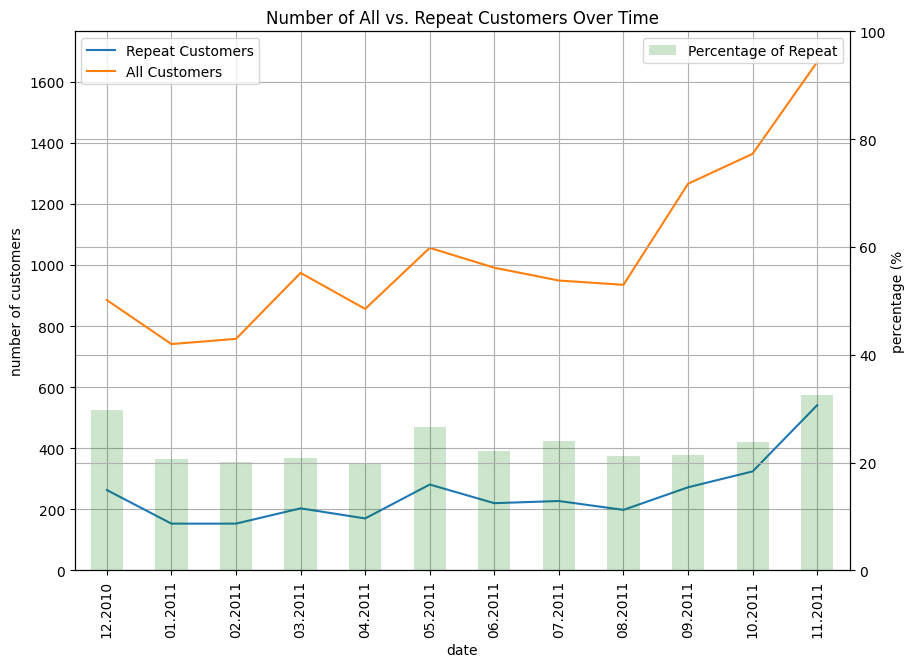

In [208]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
    rotation=45
)

plt.show()


- Revenue from Repeat Customers

In [209]:
invoice_customer_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
19926,579881,2011-11-30 17:22:00,905.52,12429.0,Denmark
19927,579885,2011-11-30 17:37:00,1075.36,15444.0,United Kingdom
19928,A563185,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
19929,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [224]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/3562107105.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'CustomerID'
/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/3562107105.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']


In [225]:
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: ME, Name: Sales, dtype: float64

In [226]:
monthly_rev_per_repeat_customers_df = monthly_rev_repeat_customers_df / monthly_revenue_df * 100
monthly_rev_per_repeat_customers_df

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: ME, Name: Sales, dtype: float64

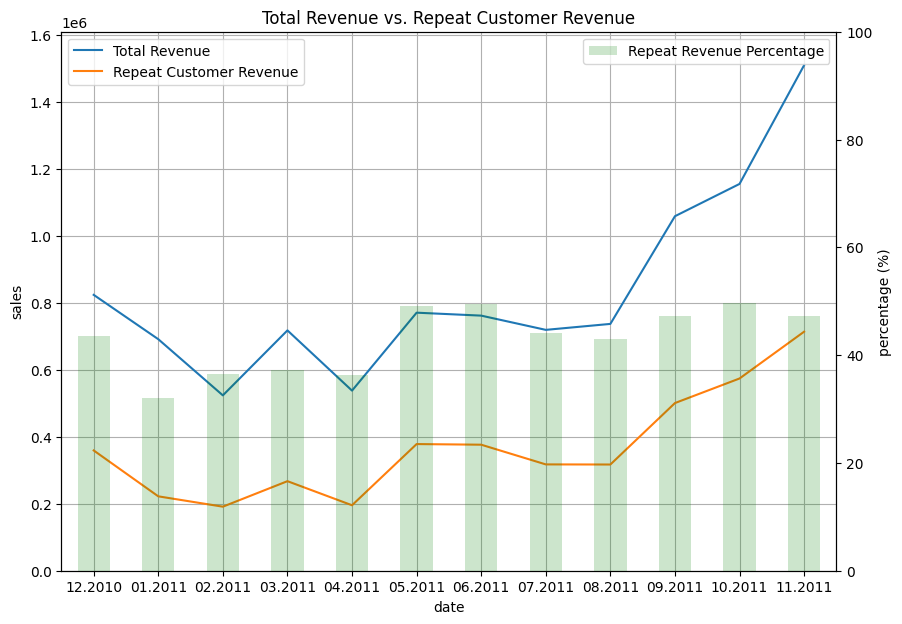

In [245]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Repeat Customer Revenue')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, monthly_revenue_df.values.max()+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_per_repeat_customers_df.values).plot(
    kind='bar',
    color='g',
    ax=ax2,
    alpha=0.2
)

ax2.set_ylim([0, 100])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

plt.xticks(
    range(len(monthly_rev_per_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in monthly_rev_per_repeat_customers_df.index],
    rotation=45
)

plt.show()

- Popular Items Over Time

In [246]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [251]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/2059398192.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'StockCode'


Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [253]:
# Ranks items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(by='Quantity', ascending=False).reset_index()
last_month_sorted_df

,StockCode,Quantity
0,23084,14954
1,84826,12551
2,22197,12460
3,22086,7908
4,85099B,5909
...,...,...
2941,84549,1
2942,84527,1
2943,90082B,1
2944,90082D,1


In [255]:
date_item_df = pd.DataFrame(
    df.loc[df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])]
).set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'
])['Quantity'].sum()

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_23851/2241319510.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'StockCode'


In [256]:
date_item_df

InvoiceDate  StockCode
2010-12-31   22086         2460
             22197         2738
             84826          366
             85099B        2152
2011-01-31   22086           24
             22197         1824
             84826          480
             85099B        2747
2011-02-28   22086            5
             22197         2666
             84826           66
             85099B        3080
2011-03-31   22086           87
             22197         2803
             84826           60
             85099B        5282
2011-04-30   22086           13
             22197         1869
             84826            1
             85099B        2456
2011-05-31   22086           17
             22197         6849
             23084         1131
             85099B        3621
2011-06-30   22086          344
             22197         2095
             23084         1713
             84826            4
             85099B        3682
2011-07-31   22086          383
             2219

In [265]:
trending_items_df = pd.pivot_table(
    date_item_df, values='Quantity', index='InvoiceDate', columns='StockCode', aggfunc='sum'
).fillna(0)
trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


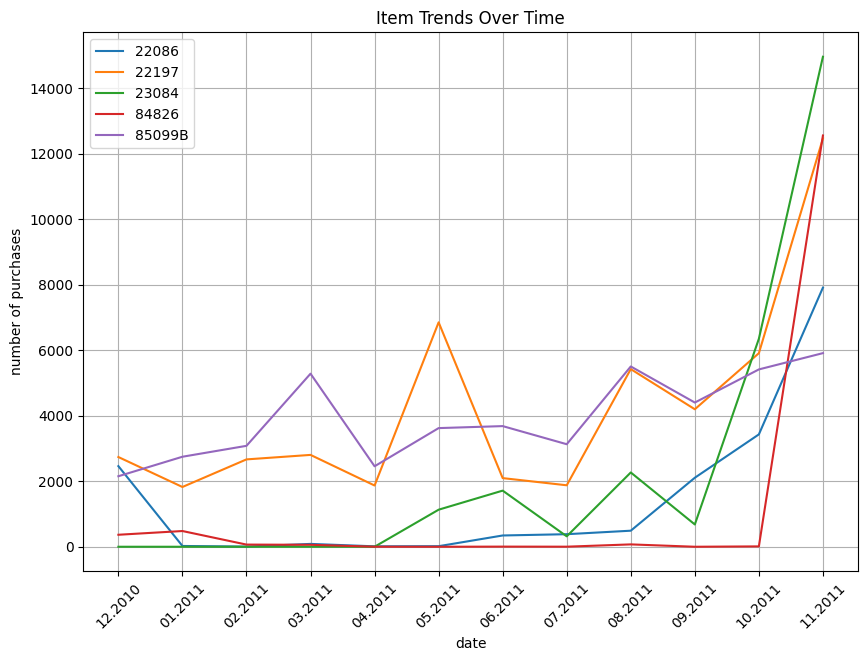

In [273]:
ax = pd.DataFrame(trending_items_df.values).plot(
    figsize=(10,7),
    grid=True
)

ax.set_xlabel('date')
ax.set_ylabel('number of purchases')
ax.set_title('Item Trends Over Time')

ax.legend(trending_items_df.columns)

plt.xticks(
    range(len(trending_items_df.index)),
    [x.strftime('%m.%Y') for x in trending_items_df.index],
    rotation=45
)

plt.show()